In [1]:
import warnings

# Ignorieren aller Warnungen
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

online_shop = pd.read_csv(r"C:\Users\Philipp\Desktop\python stuff\Online Shop Customer Sales Data.csv")

In [3]:
online_shop.head(11)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
5,504313,55,0,13.7,6,14.05.21,12.467,1,364,1,0,0
6,504314,17,1,30.7,6,09.01.21,2.456,0,654,0,0,0
7,504315,30,1,8.1,7,28.03.21,6.561,3,1011,0,0,0
8,504316,51,0,18.0,4,04.08.21,11.880,0,312,3,1,0
9,504317,63,1,19.2,4,06.10.21,11.904,3,828,0,0,0


- Customer_id - Kunden ID
- Age - Alter
- Gender - Geschlecht
- Revenue_Total - Gesamtertrag
- N_Purchases - 
- Purchase_DATE - Einkaufsdatum
- Purchase_VALUE - Einkaufsbetrag
- Pay_Method - Bezahlungsmethode
- Time_Spent - Zeit verbracht
- Browser - Browser
- Newsletter - Newsletter abboniert Ja/Nein
- Voucher - Gutschein vorhanden Ja/Nein

In [4]:
online_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [5]:
round(online_shop.describe(),2)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
count,65796.00,65796.00,65796.00,65796.00,65796.00,65796.00,65796.00,65796.00,65796.00,65796.00,65796.00
mean,537205.50,39.59,0.67,27.73,3.99,15.97,1.31,598.93,0.63,0.15,0.25
std,18993.81,13.83,0.47,14.94,2.00,13.23,1.08,277.83,1.00,0.36,0.43
min,504308.00,16.00,0.00,0.50,1.00,0.00,0.00,120.00,0.00,0.00,0.00
25%,520756.75,28.00,0.00,15.30,2.00,4.82,0.00,358.00,0.00,0.00,0.00
50%,537205.50,40.00,1.00,30.10,4.00,12.64,1.00,598.00,0.00,0.00,0.00
75%,553654.25,51.00,1.00,37.60,6.00,24.75,2.00,840.00,1.00,0.00,1.00
max,570103.00,63.00,1.00,59.90,7.00,59.90,3.00,1080.00,3.00,1.00,1.00


In [6]:
online_shop.isnull().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [8]:
online_shop.duplicated().sum()

0

In [13]:
display(online_shop['Age'].value_counts())

Age
50    1458
38    1425
25    1422
39    1420
62    1410
49    1410
48    1410
32    1408
46    1406
45    1404
44    1403
56    1401
21    1397
63    1396
47    1393
57    1389
53    1388
61    1384
52    1383
51    1377
29    1377
28    1372
20    1372
27    1371
42    1369
30    1365
26    1364
41    1363
17    1362
54    1358
40    1350
35    1350
36    1346
33    1345
18    1343
43    1342
31    1342
23    1342
60    1340
55    1339
59    1338
34    1338
19    1336
16    1335
22    1328
37    1316
58    1307
24    1302
Name: count, dtype: int64

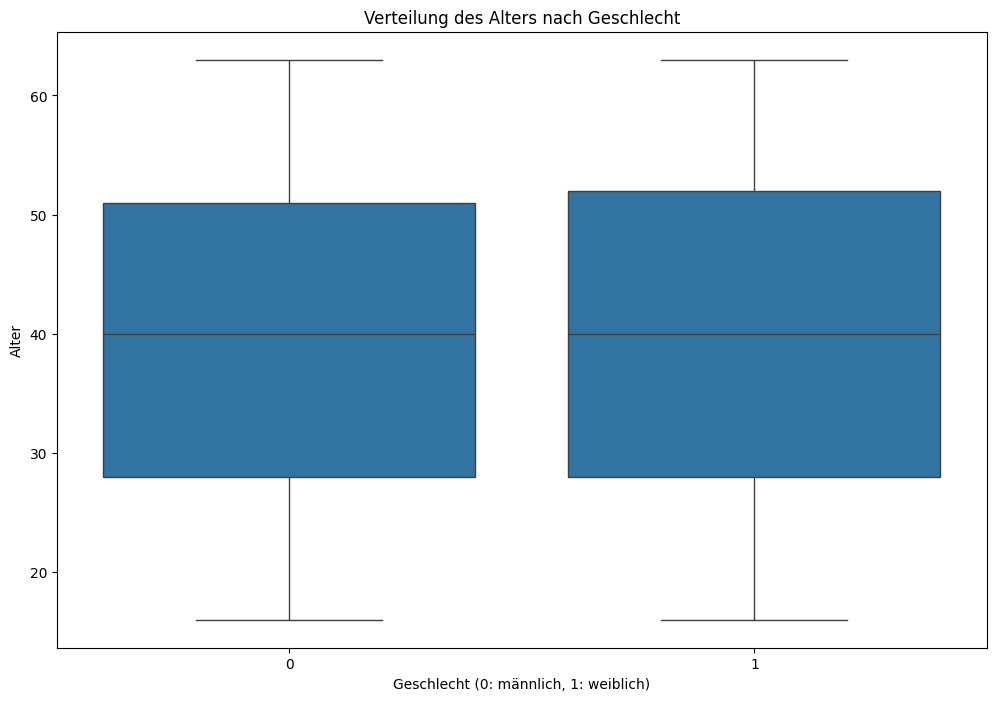

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Age', data=online_shop)
plt.title('Verteilung des Alters nach Geschlecht')
plt.xlabel('Geschlecht (0: männlich, 1: weiblich)')
plt.ylabel('Alter')
plt.show()

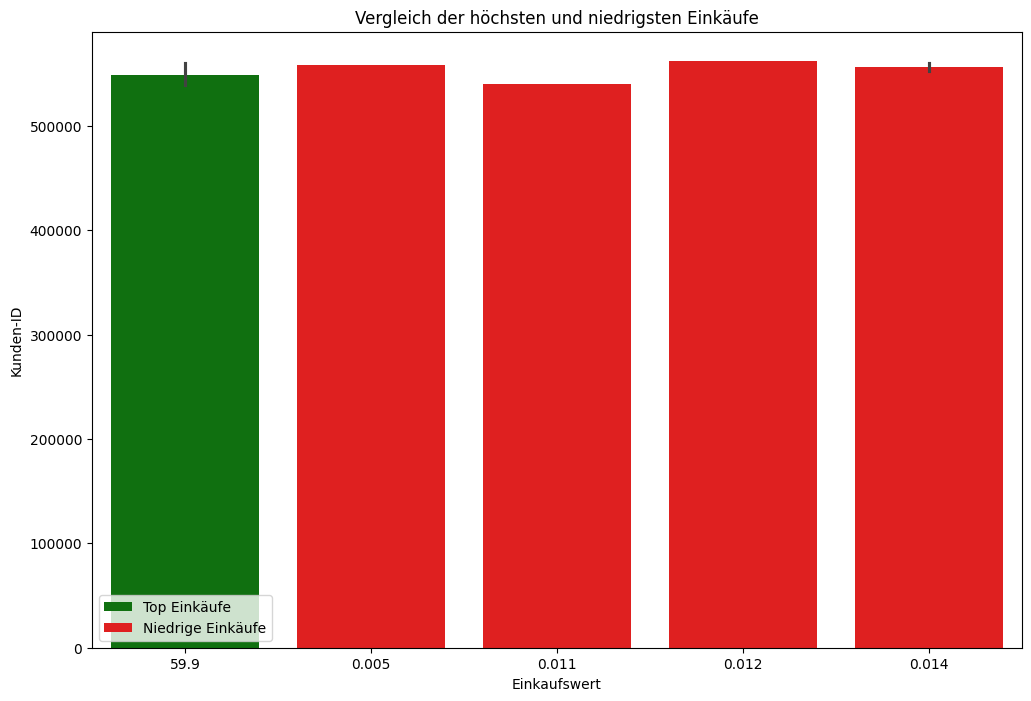

In [17]:
sorted_data = online_shop.sort_values(by='Purchase_VALUE')

top_purchases = sorted_data.tail(5)  
bottom_purchases = sorted_data.head(5)  

plt.figure(figsize=(12, 8))
sns.barplot(x='Purchase_VALUE', y='Customer_id', data=top_purchases, color='green', label='Top Einkäufe')
sns.barplot(x='Purchase_VALUE', y='Customer_id', data=bottom_purchases, color='red', label='Niedrige Einkäufe')
plt.xlabel('Einkaufswert')
plt.ylabel('Kunden-ID')
plt.title('Vergleich der höchsten und niedrigsten Einkäufe')
plt.legend()
plt.show()

C:\Users\Philipp\AppData\Local\Temp\ipykernel_14436\4085801602.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  newsletter_counts = online_shop.groupby(['Age_Group', 'Newsletter']).size().unstack(fill_value=0)


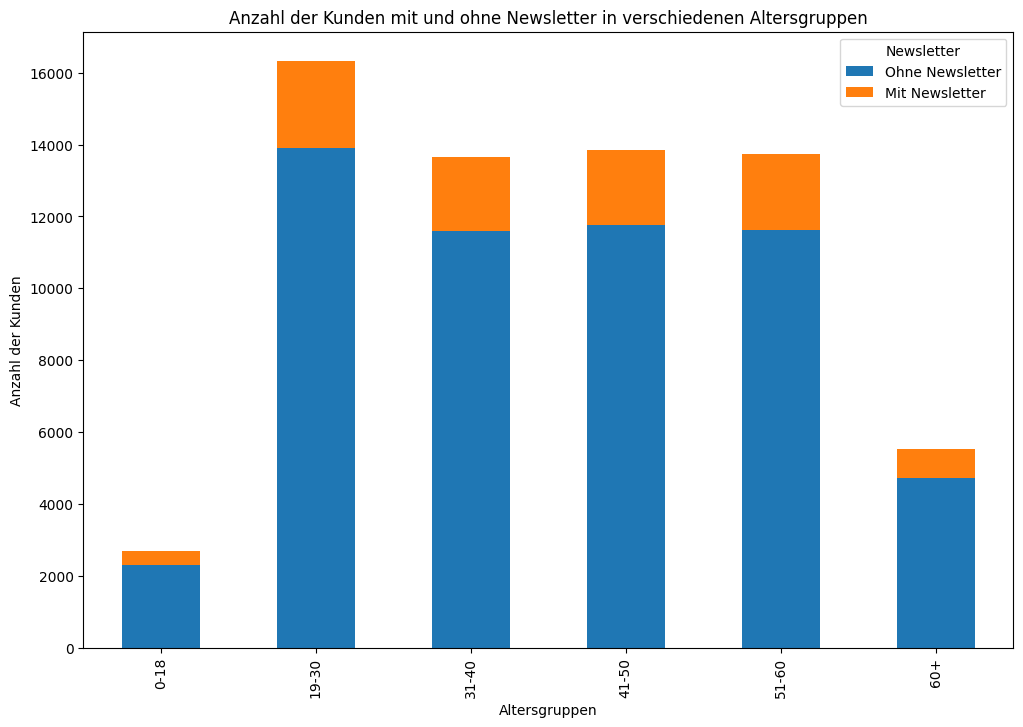

In [18]:
newsletter_counts = online_shop.groupby(['Age_Group', 'Newsletter']).size().unstack(fill_value=0)

newsletter_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Anzahl der Kunden mit und ohne Newsletter in verschiedenen Altersgruppen')
plt.xlabel('Altersgruppen')
plt.ylabel('Anzahl der Kunden')
plt.legend(title='Newsletter', labels=['Ohne Newsletter', 'Mit Newsletter'])
plt.show()

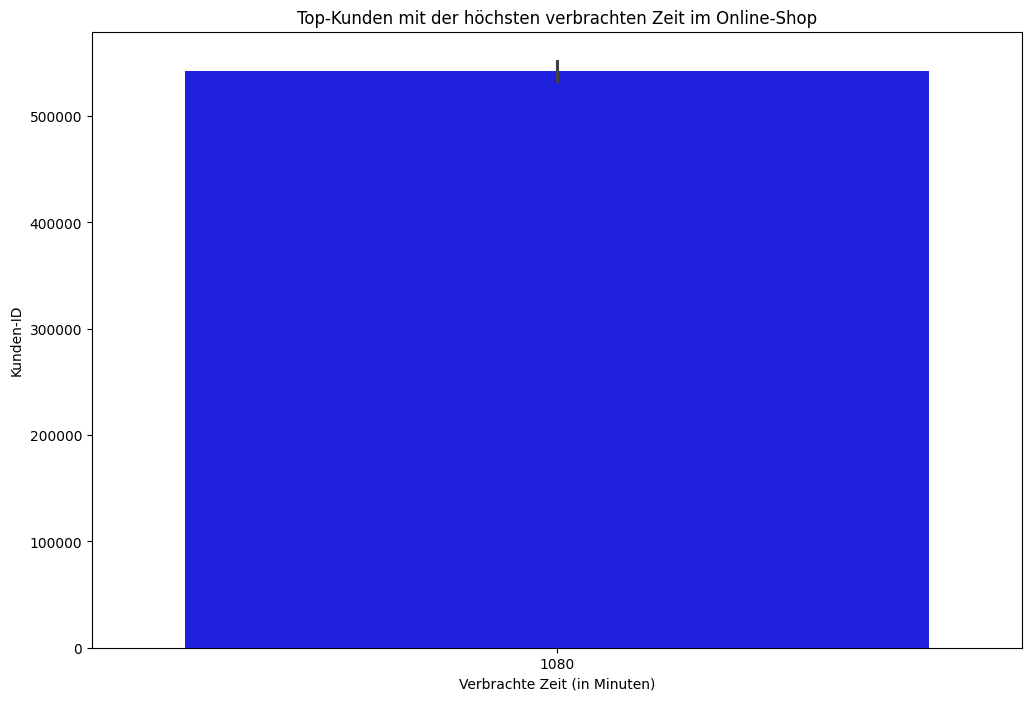

In [19]:
sorted_data = online_shop.sort_values(by='Time_Spent', ascending=False)

top_customers = sorted_data.head(10)  

plt.figure(figsize=(12, 8))
sns.barplot(x='Time_Spent', y='Customer_id', data=top_customers, color='blue')
plt.title('Top-Kunden mit der höchsten verbrachten Zeit im Online-Shop')
plt.xlabel('Verbrachte Zeit (in Minuten)')
plt.ylabel('Kunden-ID')
plt.show()

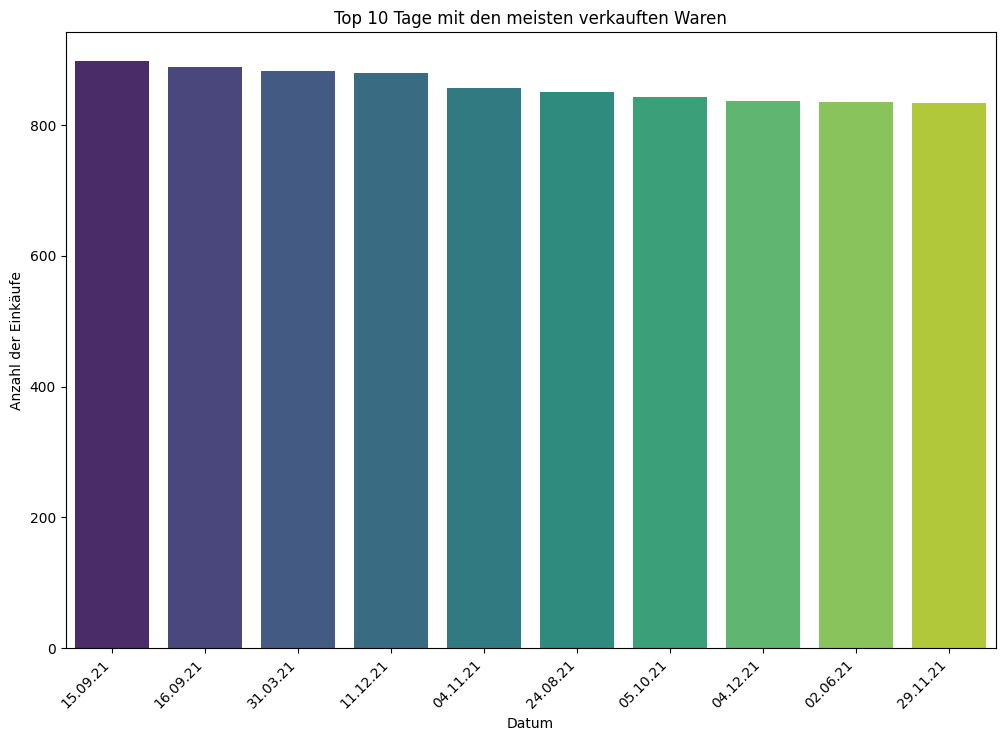

In [25]:
daily_purchases = online_shop.groupby('Purchase_DATE')['N_Purchases'].sum().reset_index()

top_10_days = daily_purchases.nlargest(10, 'N_Purchases')

plt.figure(figsize=(12, 8))
sns.barplot(x='Purchase_DATE', y='N_Purchases', hue='Purchase_DATE', data=top_10_days, palette='viridis', legend=False)
plt.title('Top 10 Tage mit den meisten verkauften Waren')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Einkäufe')
plt.xticks(rotation=45, ha='right') 
plt.show()

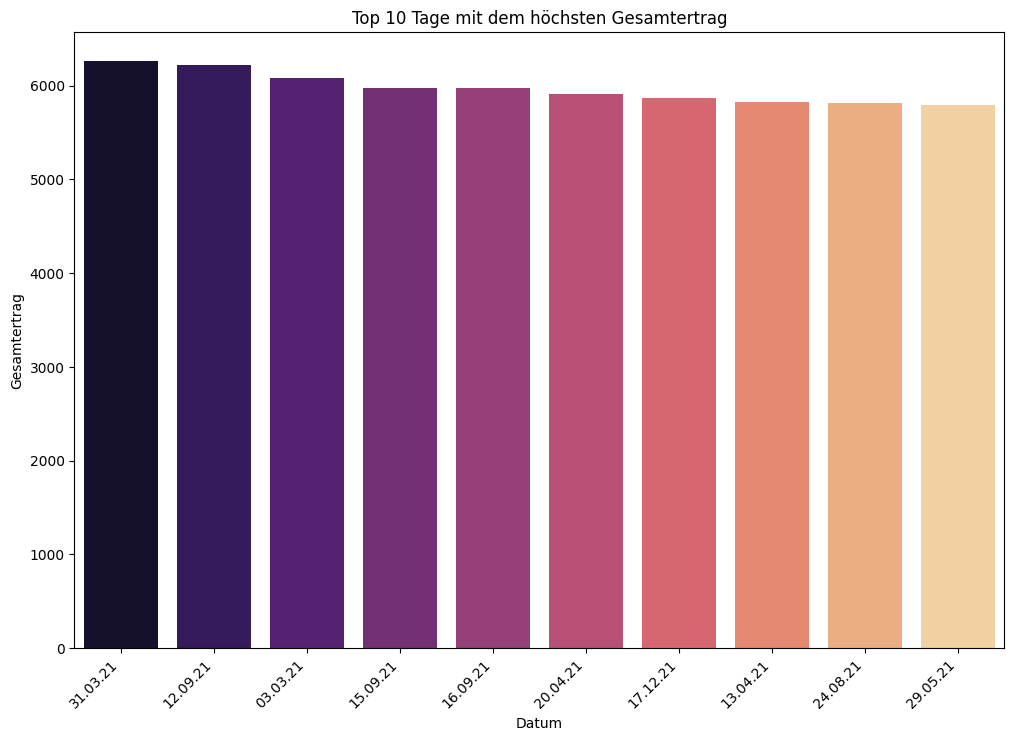

In [27]:
daily_revenue = online_shop.groupby('Purchase_DATE')['Revenue_Total'].sum().reset_index()

top_10_days_revenue = daily_revenue.nlargest(10, 'Revenue_Total')

plt.figure(figsize=(12, 8))
sns.barplot(x='Purchase_DATE', y='Revenue_Total', hue='Purchase_DATE', data=top_10_days_revenue, palette='magma', legend=False)
plt.title('Top 10 Tage mit dem höchsten Gesamtertrag')
plt.xlabel('Datum')
plt.ylabel('Gesamtertrag')
plt.xticks(rotation=45, ha='right') 
plt.show()